In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

style.use("fivethirtyeight")
style.use("seaborn-talk")
#plt.rcParams['font.family'] = 'serif'

import warnings
warnings.filterwarnings('ignore')

In [1]:
import os
os.listdir("../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing")

['data1.csv', 'data2.csv', 'data3.csv', 'data4.csv', 'data5.csv', 'data6.csv']

In [3]:
for i, file in enumerate(os.listdir("../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing")):
    globals()[f'data{i+1}'] = pd.read_csv("../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing/"+file,index_col=0)

In [4]:
import matplotlib.pyplot as plt
plt.rc('font',family='Gulim')

In [5]:
datas = [data1, data2, data3, data4, data5, data6]
cust = data1

# 상품별 가격
- data2와 data4를 이용해 상품의 가격을 역으로 유추하여 상품별 가격을 data4의 변수로 추가했습니다.
- 상품의 가격은 data2에서 상품 코드에 대한 (구매 금액)/(구매 수량)으로 추정했습니다.

In [6]:
data2 = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing/data2.csv')
data2.drop('Unnamed: 0', axis=1, inplace=True)
data4 = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing/data4.csv', index_col=0)
data2.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M000034966,A01016688590,1,A01,A010045,PD0777,20210116,18,78000.0,2
1,M000034966,A01016688590,1,A01,A010045,PD0796,20210116,18,100.0,1
2,M000034966,A01016718167,1,A01,A010045,PD0816,20210116,18,62100.0,1
3,M000034966,A02357398521,1,A02,A020116,PD0616,20210325,13,17900.0,2
4,M000034966,A02357398521,1,A02,A020116,PD0630,20210325,13,59700.0,3


In [7]:
data4.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [8]:
data4.pd_c

0       PD0001
1       PD0002
2       PD0003
3       PD0004
4       PD0005
         ...  
1928    PD1929
1929    PD1930
1930    PD1931
1931    PD1932
1932    PD1933
Name: pd_c, Length: 1933, dtype: object

In [9]:
len(data4.pd_c.unique())

1933

In [10]:
len(data4.pd_nm.unique())

1932

In [11]:
categorys = ['clac_hlv_nm', 'clac_mcls_nm', 'pd_nm']
for category in categorys:
    print(data4[category].value_counts())
    print()

패션잡화          130
축산물            91
수산물            88
스포츠패션          82
문구/사무용품        72
채소             72
유아동의류          67
과일             58
속옷/양말/홈웨어      56
조미료            51
화장품/뷰티케어       50
생활/주방가전        43
퍼스널케어          39
원예/애완          39
구기/필드스포츠       38
조리식품           38
식기/조리기구        36
과자             36
침구/수예          35
자동차용품          35
아웃도어/레저        34
건강식품           32
출산/육아용품        32
냉장식품           32
주방잡화           32
가구             31
완구             31
건해산물           30
청소/세탁/욕실용품     30
여성의류           29
대용식            29
세제/위생          28
영상/음향가전        27
남성의류           26
건강용품           25
음료             24
테넌트/음식점        22
주류             22
시즌스포츠          22
인테리어/조명        21
커피/차           20
냉동식품           20
헬스/피트니스        15
양곡             15
서적/음반/악기       15
공구/안전용품        15
계절가전           15
컴퓨터            14
병통조림           14
생활/렌탈서비스       13
냉장/세탁가전        12
상품권            10
유제품             9
기타(비상품)         7
담배              6
여행/레저서비스  

In [12]:
data4[data4['pd_nm']=='기타']

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
85,PD0086,기타,건강용품,일반의약외품
282,PD0283,기타,기타(비상품),기타


In [13]:
data2['buy_am_per_ct'] = data2['buy_am']/data2['buy_ct']

In [14]:
pd_price = data2.groupby('pd_c').mean()['buy_am_per_ct'].apply(int)
print(pd_price)

pd_c
PD0001    2143346
PD0002      43059
PD0003     201200
PD0004     133424
PD0005     959597
           ...   
PD1929     151097
PD1930     146227
PD1931     142878
PD1932     197372
PD1933      75220
Name: buy_am_per_ct, Length: 1932, dtype: int64


<AxesSubplot:xlabel='buy_am_per_ct', ylabel='Density'>

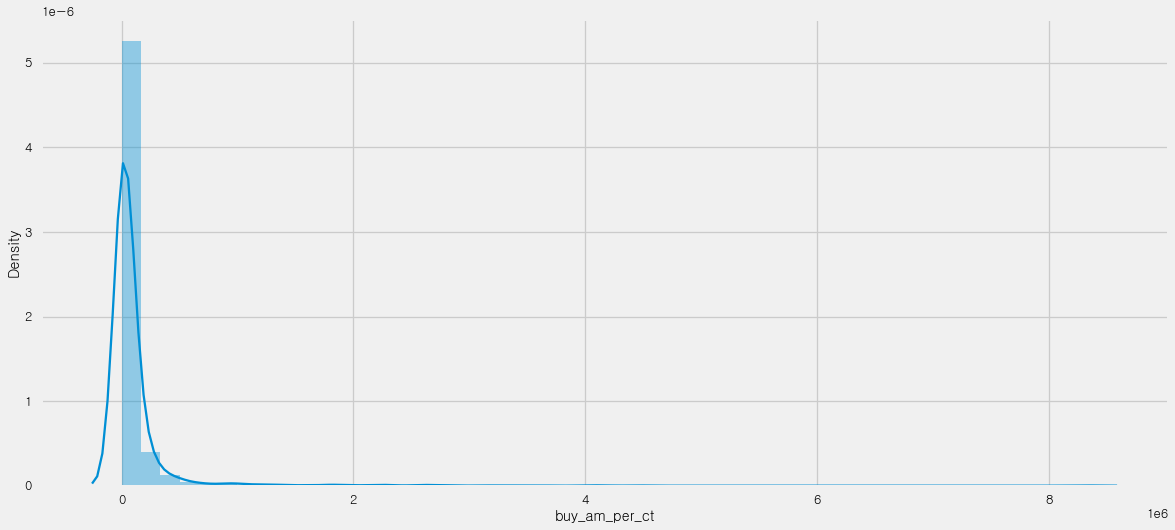

In [15]:
f, ax = plt.subplots(figsize=(18, 8))
sns.distplot(pd_price)

In [16]:
df4 = pd.merge(data4, pd_price, on='pd_c')
df4.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm,buy_am_per_ct
0,PD0001,소파,가구,거실가구,2143346
1,PD0002,스툴/리빙의자,가구,거실가구,43059
2,PD0003,탁자,가구,거실가구,201200
3,PD0004,장식장/진열장,가구,거실가구,133424
4,PD0005,기타가구,가구,기타가구,959597


In [4]:
df4 = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/new/product_price.csv', index_col=0)

In [18]:
df4['log_buy_am_per_ct'] = np.log1p(df4['buy_am_per_ct'])
df4.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm,buy_am_per_ct,log_buy_am_per_ct
0,PD0001,소파,가구,거실가구,2143346,14.577879
1,PD0002,스툴/리빙의자,가구,거실가구,43059,10.670350
2,PD0003,탁자,가구,거실가구,201200,12.212060
3,PD0004,장식장/진열장,가구,거실가구,133424,11.801295
4,PD0005,기타가구,가구,기타가구,959597,13.774270


In [19]:
order = df4.groupby('clac_hlv_nm')['log_buy_am_per_ct'].mean().sort_values().index

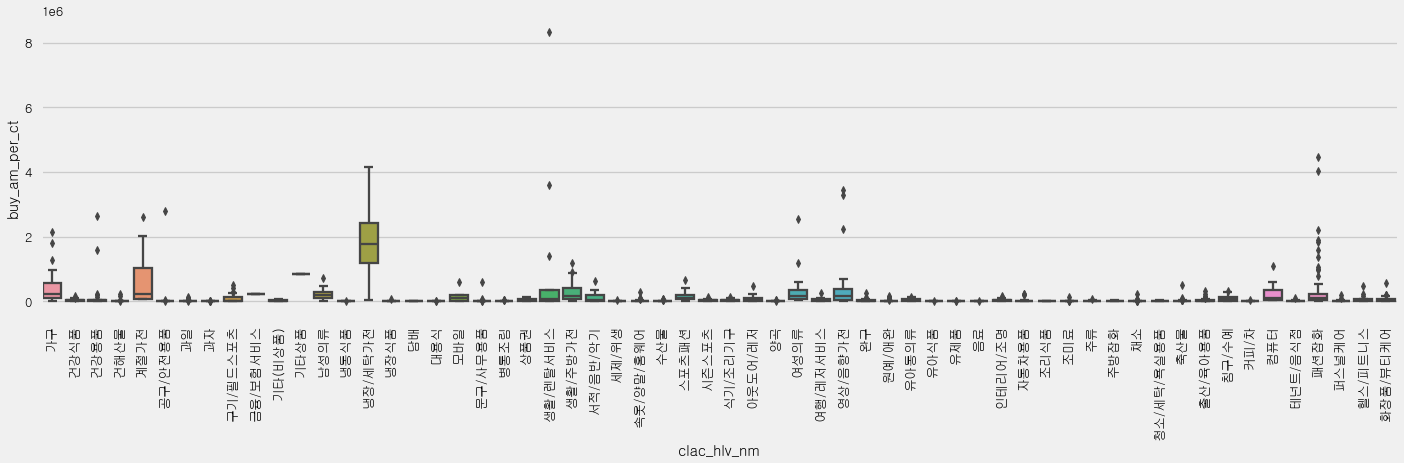

In [20]:
g=sns.catplot(x='clac_hlv_nm', y='buy_am_per_ct', kind='box', data=df4, height=5, aspect=4) # 상품 대분류별 가격비교
g.set_xticklabels(rotation=90)

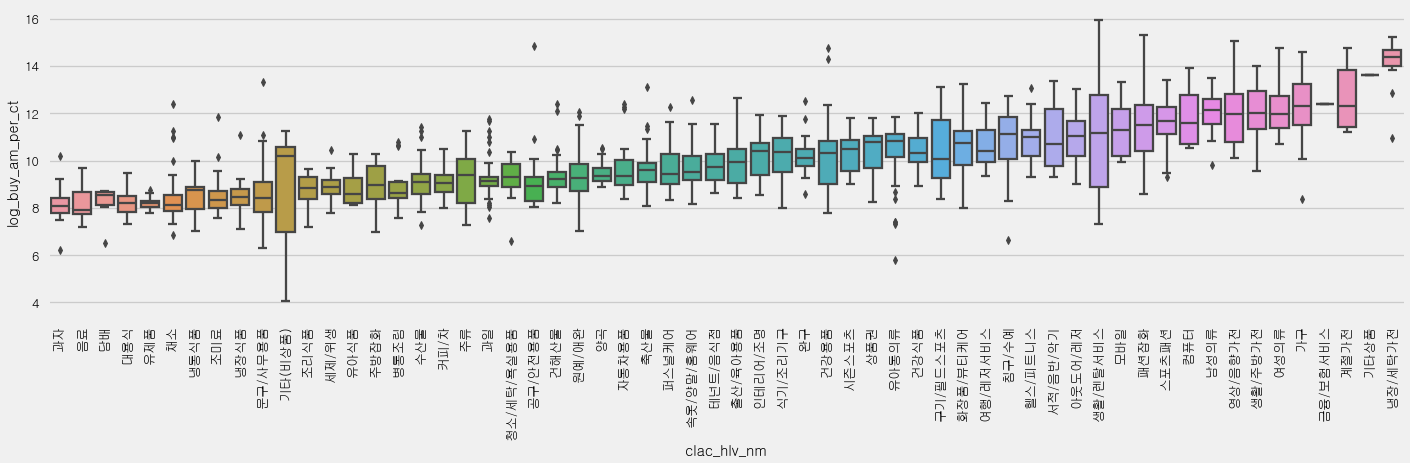

In [21]:
g=sns.catplot(x='clac_hlv_nm', y='log_buy_am_per_ct', kind='box', data=df4, height=5, aspect=4, order=order) # 상품 대분류별 가격비교
g.set_xticklabels(rotation=90)

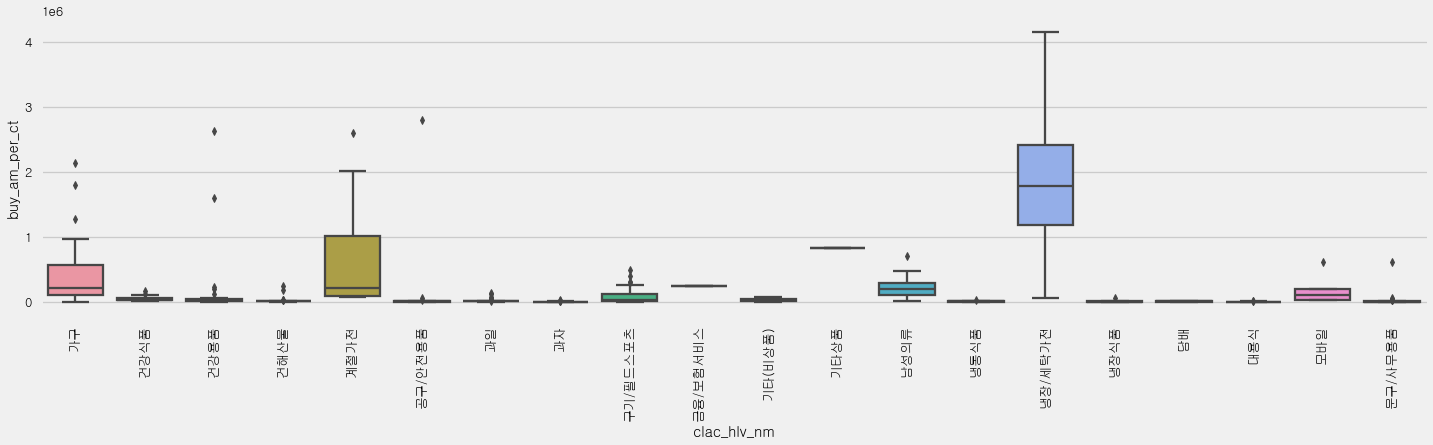

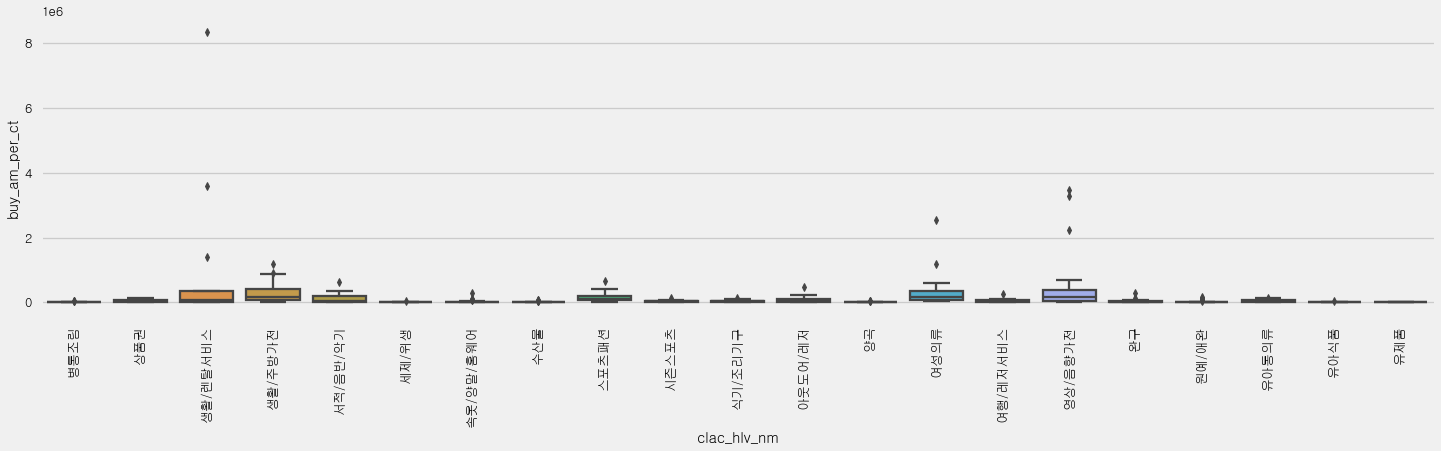

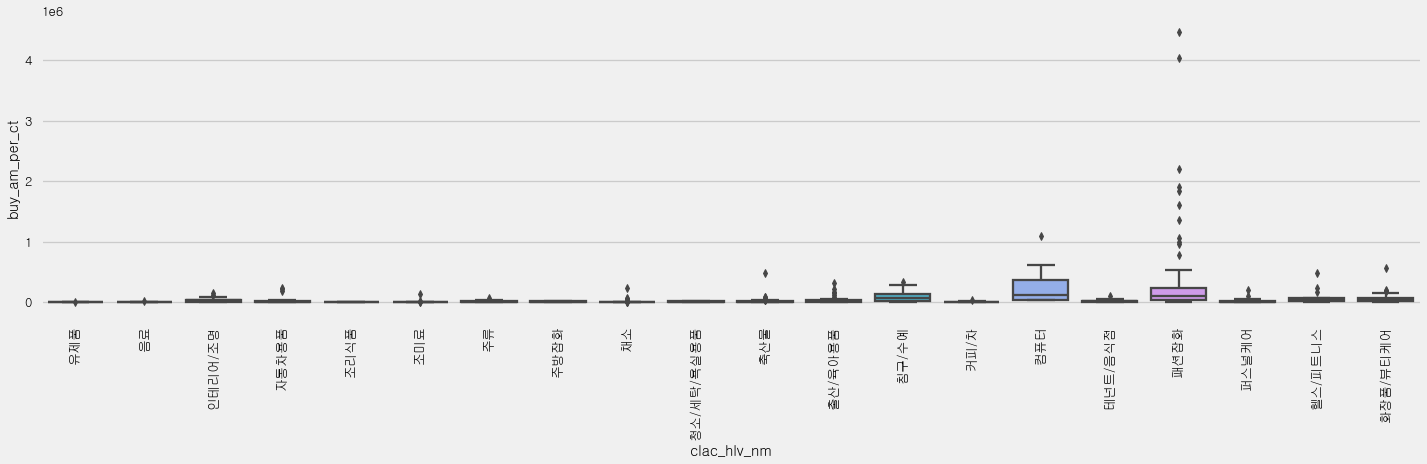

In [22]:
g1=sns.catplot(x='clac_hlv_nm', y='buy_am_per_ct', kind='box', data=df4[:492],height=5, aspect=4) # 상품 대분류별 가격비교
g1.set_xticklabels(rotation=90)
g2=sns.catplot(x='clac_hlv_nm', y='buy_am_per_ct', kind='box', data=df4[492:1151],height=5, aspect=4) # 상품 대분류별 가격비교
g2.set_xticklabels(rotation=90)
g3=sns.catplot(x='clac_hlv_nm', y='buy_am_per_ct', kind='box', data=df4[1151:],height=5, aspect=4) # 상품 대분류별 가격비교
g3.set_xticklabels(rotation=90)

# 고객별 구매상품
- data2와 data4를 병합하여 고객이 구매한 상품을 리스트 형태로 추출하였습니다.
- 고객이 가장 많이 구입한 상위 5개 상품을 Top5 구매상품으로 추가했습니다.

## 구매 상품 리스트

In [23]:
len(data2.pd_c.unique())

1932

In [24]:
len(data4.pd_c.unique())

1933

In [25]:
df24 = pd.merge(data2,data4, how='left',on='pd_c')
df24.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,buy_am_per_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M000034966,A01016688590,1,A01,A010045,PD0777,20210116,18,78000.0,2,39000.0,남성런닝/트레이닝화,스포츠패션,남성스포츠화
1,M000034966,A01016688590,1,A01,A010045,PD0796,20210116,18,100.0,1,100.0,스포츠아대/헤어밴드,스포츠패션,스포츠잡화
2,M000034966,A01016718167,1,A01,A010045,PD0816,20210116,18,62100.0,1,62100.0,여성런닝/트레이닝화,스포츠패션,여성스포츠화
3,M000034966,A02357398521,1,A02,A020116,PD0616,20210325,13,17900.0,2,8950.0,남성팬티,속옷/양말/홈웨어,남성속옷
4,M000034966,A02357398521,1,A02,A020116,PD0630,20210325,13,59700.0,3,19900.0,브래지어,속옷/양말/홈웨어,여성속옷


In [32]:
cust['purchase_list']="['']"
df_pur = df24.groupby(['cust', 'pd_c'])['pd_c'].count()

before_i = ''
for i, j in df_pur.index:
    if i != before_i:
        cust.loc[cust['cust']==i, 'purchase_list'] = str(list(df_pur[i].index))
        before_i = i
    else:
        before_i = i
        continue
cust

,cust,ma_fem_dv,ages,zon_hlv,purchase_list
0,M000034966,여성,40대,Z07,"['PD0116', 'PD0169', 'PD0178', 'PD0204', 'PD02..."
1,M000059535,여성,30대,Z12,['']
2,M000136117,여성,30대,Z11,"['PD0173', 'PD0197', 'PD0290', 'PD0296', 'PD02..."
3,M000201112,여성,50대,Z17,"['PD0217', 'PD0220', 'PD0230', 'PD0282', 'PD03..."
4,M000225114,여성,40대,Z17,"['PD0178', 'PD0197', 'PD0209', 'PD0218', 'PD02..."
...,...,...,...,...,...
29908,M999708287,여성,40대,Z10,['']
29909,M999770689,여성,30대,Z16,"['PD0058', 'PD0060', 'PD0068', 'PD0161', 'PD02..."
29910,M999849895,여성,20대,Z04,"['PD0080', 'PD0223', 'PD0228', 'PD0229', 'PD02..."
29911,M999926092,남성,30대,Z08,['']


## Top5 구매상품

In [33]:
df24.groupby(['cust'])['clac_hlv_nm'].value_counts()

cust        clac_hlv_nm
M000034966  채소             7
            과자             6
            조미료            5
            과일             3
            속옷/양말/홈웨어      3
                          ..
M999962961  생활/주방가전        1
            시즌스포츠          1
            양곡             1
            여행/레저서비스       1
            주방잡화           1
Name: clac_hlv_nm, Length: 496399, dtype: int64

In [34]:
df24.groupby(['cust'])['clac_hlv_nm'].count()

cust
M000034966     42
M000136117     85
M000201112     20
M000225114    135
M000261625     60
             ... 
M999599111     29
M999673157     21
M999770689    278
M999849895     65
M999962961    294
Name: clac_hlv_nm, Length: 26913, dtype: int64

In [35]:
df24.groupby(['cust'])['clac_hlv_nm'].count().describe()

count    26913.000000
mean       137.861814
std        176.425293
min          1.000000
25%         25.000000
50%         74.000000
75%        182.000000
max       2078.000000
Name: clac_hlv_nm, dtype: float64

In [36]:
df24.groupby(['cust','clac_hlv_nm'])['clac_hlv_nm'].count()

cust        clac_hlv_nm
M000034966  건해산물            1
            과일              3
            과자              6
            냉동식품            1
            대용식             1
                           ..
M999962961  커피/차            5
            테넌트/음식점         3
            패션잡화            5
            퍼스널케어           6
            화장품/뷰티케어       10
Name: clac_hlv_nm, Length: 496399, dtype: int64

In [37]:
p1=pd.DataFrame({'count' : df24.groupby(['cust','clac_hlv_nm'])['clac_hlv_nm'].count()}).reset_index()
p1.head()

,cust,clac_hlv_nm,count
0,M000034966,건해산물,1
1,M000034966,과일,3
2,M000034966,과자,6
3,M000034966,냉동식품,1
4,M000034966,대용식,1


In [38]:
L=[]
for i in p1.cust.unique():
    L.append(p1.loc[p1['cust'] == i].nlargest(n=5,columns='count',keep='first')['clac_hlv_nm'].values)

In [39]:
p2=pd.DataFrame({'cust':p1.cust.unique(),'Top5상품':L})
p2

,cust,Top5상품
0,M000034966,"[채소, 과자, 조미료, 과일, 속옷/양말/홈웨어]"
1,M000136117,"[여성의류, 침구/수예, 패션잡화, 남성의류, 세제/위생]"
2,M000201112,"[대용식, 과자, 음료, 조리식품, 냉장식품]"
3,M000225114,"[과자, 냉장식품, 조리식품, 과일, 채소]"
4,M000261625,"[화장품/뷰티케어, 테넌트/음식점, 퍼스널케어, 모바일, 속옷/양말/홈웨어]"
...,...,...
26908,M999599111,"[유제품, 축산물, 담배, 대용식, 과자]"
26909,M999673157,"[담배, 과자, 기타(비상품), 남성의류, 테넌트/음식점]"
26910,M999770689,"[조리식품, 과자, 대용식, 음료, 테넌트/음식점]"
26911,M999849895,"[기타(비상품), 냉장식품, 과자, 조미료, 수산물]"


In [52]:
L1=[]
for i in p2.cust.unique():
    sum=0
    for products in p2[p2['cust']==i].Top5상품.values:
        for j in products:
            sum+=float(df4.loc[df4['clac_hlv_nm']==j, 'buy_am_per_ct'].mean())
    L1.append(sum)

In [53]:
p3=pd.DataFrame({'cust':p1.cust.unique(),'Top5상품':L,'Top5상품금액':L1})
p3

,cust,Top5상품,Top5상품금액
0,M000034966,"[채소, 과자, 조미료, 과일, 속옷/양말/홈웨어]",64592.990860
1,M000136117,"[여성의류, 침구/수예, 패션잡화, 남성의류, 세제/위생]",930174.155987
2,M000201112,"[대용식, 과자, 음료, 조리식품, 냉장식품]",27313.428293
3,M000225114,"[과자, 냉장식품, 조리식품, 과일, 채소]",44512.704155
4,M000261625,"[화장품/뷰티케어, 테넌트/음식점, 퍼스널케어, 모바일, 속옷/양말/홈웨어]",323982.793909
...,...,...,...
26908,M999599111,"[유제품, 축산물, 담배, 대용식, 과자]",40245.850143
26909,M999673157,"[담배, 과자, 기타(비상품), 남성의류, 테넌트/음식점]",282347.402847
26910,M999770689,"[조리식품, 과자, 대용식, 음료, 테넌트/음식점]",42919.095907
26911,M999849895,"[기타(비상품), 냉장식품, 과자, 조미료, 수산물]",57991.090917


In [54]:
cust = pd.merge(cust, p3, how='outer',on='cust')
cust['Top5상품'].fillna('0번 구매',inplace=True)
cust['Top5상품금액'].fillna(0,inplace=True)
cust.head()

,cust,ma_fem_dv,ages,zon_hlv,purchase_list,Top5상품,Top5상품금액
0,M000034966,여성,40대,Z07,"['PD0116', 'PD0169', 'PD0178', 'PD0204', 'PD02...","[채소, 과자, 조미료, 과일, 속옷/양말/홈웨어]",64592.990860
1,M000059535,여성,30대,Z12,[''],0번 구매,0.000000
2,M000136117,여성,30대,Z11,"['PD0173', 'PD0197', 'PD0290', 'PD0296', 'PD02...","[여성의류, 침구/수예, 패션잡화, 남성의류, 세제/위생]",930174.155987
3,M000201112,여성,50대,Z17,"['PD0217', 'PD0220', 'PD0230', 'PD0282', 'PD03...","[대용식, 과자, 음료, 조리식품, 냉장식품]",27313.428293
4,M000225114,여성,40대,Z17,"['PD0178', 'PD0197', 'PD0209', 'PD0218', 'PD02...","[과자, 냉장식품, 조리식품, 과일, 채소]",44512.704155


# 고객별 구매주기
- 고객의 구매에 대한 정보가 담긴 data2, data3, data6의 구매시간 변수를 통해 구매주기를 구했습니다.
- 전체 구매, 유통사 구매, 제휴사 이용, LPAY 결제에 대한 주기를 각각 구했습니다.
- 고객의 구매 데이터에서 두 번 이상의 구매가 나타날 경우 주기를 표기하였고 구매 내역이 없거나 한 번의 구매만 나타난 경우 각각 '0번 구매', '1번 구매'로 표기했습니다.

In [6]:
only_data2 = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/clustering/only_data2.csv', index_col=0)
only_data3 = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/clustering/only_data3.csv', index_col=0)
only_data6 = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/clustering/only_data6.csv', index_col=0)

In [56]:
df6_2 = only_data6[only_data6['cop_c'].apply(lambda x: x[0]) == 'A']
df6_3 = only_data6[only_data6['cop_c'].apply(lambda x: x[0]) != 'A']
df6_2.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500
5,M848083175,210803180197432,A01,1,20210803,18,14000


In [57]:
data2_1 = pd.concat([only_data2, df6_2])
data3_1 = pd.concat([only_data3, df6_3])
data2_1.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M000034966,A01016688590,1,A01,A010045,PD0777,20210116,18,78000.0,2.0
1,M000034966,A01016688590,1,A01,A010045,PD0796,20210116,18,100.0,1.0
2,M000034966,A01016718167,1,A01,A010045,PD0816,20210116,18,62100.0,1.0
3,M000034966,A02357398521,1,A02,A020116,PD0616,20210325,13,17900.0,2.0
4,M000034966,A02357398521,1,A02,A020116,PD0630,20210325,13,59700.0,3.0


## data2

In [58]:
data2_1['de_dt']=pd.to_datetime(data2_1.de_dt.apply(str)) #날짜 형태로 바꿈
dup = data2_1[['cust','de_dt']].duplicated()
print('고객과 이용일자가 중복된 데이터의 개수',len(dup[dup==True]))
print('고객과 이용일자가 중복되지 않은 데이터의 개수:',len(dup[dup==False]))

고객과 이용일자가 중복된 데이터의 개수 2988359
고객과 이용일자가 중복되지 않은 데이터의 개수: 912232


In [59]:
df2=data2_1[['cust','de_dt']][dup==False]
A1=pd.DataFrame({'annual_count' : df2.groupby(['cust'])['de_dt'].count()}).reset_index()
Only_one_purchase=A1.loc[A1['annual_count'] == 1].cust.values
A2=pd.DataFrame({'count' : df2.groupby(['cust','de_dt'])['de_dt'].count()}).reset_index()
idx = A2[A2['cust'].isin(Only_one_purchase)].index
A2.drop(idx,inplace=True)
A3=A2.groupby(['cust','de_dt'])['de_dt'].count()

In [60]:
customer,time=A3.index[0]
Distance=[]
L=[]
for i,j in A3.index[1:]:
    if customer==i:
        Distance.append(j-time)
        time=j
    else:
        mean=pd.Series(Distance).mean()
        L.append(mean)
        Distance=[]
        customer=i
        time=j
mean=pd.Series(Distance).mean()
L.append(mean)

In [61]:
cycle2=pd.DataFrame({'cust':A2.cust.unique(),'유통평균주기':L})
one2=pd.DataFrame({'cust':Only_one_purchase,'유통평균주기':'1번 구매'})

In [62]:
cycle_one2=pd.concat([cycle2,one2])
cycle_one2

,cust,유통평균주기
0,M000034966,56 days 20:00:00
1,M000136117,12 days 09:55:51.724137931
2,M000201112,42 days 00:00:00
3,M000225114,8 days 05:11:21.081081081
4,M000261625,16 days 00:00:00
...,...,...
1978,M994285756,1번 구매
1979,M994550219,1번 구매
1980,M995528586,1번 구매
1981,M996092967,1번 구매


## data3

In [63]:
data3_1['de_dt']=pd.to_datetime(data3_1.de_dt.apply(str)) #날짜 형태로 바꿈
dup = data3_1[['cust','de_dt']].duplicated()
print('고객과 이용일자가 중복된 데이터의 개수',len(dup[dup==True]))
print('고객과 이용일자가 중복되지 않은 데이터의 개수:',len(dup[dup==False]))

고객과 이용일자가 중복된 데이터의 개수 72801
고객과 이용일자가 중복되지 않은 데이터의 개수: 277963


In [64]:
df3=data3_1[['cust','de_dt']][dup==False]
A1=pd.DataFrame({'annual_count' : df3.groupby(['cust'])['de_dt'].count()}).reset_index()
Only_one_purchase=A1.loc[A1['annual_count'] == 1].cust.values
A2=pd.DataFrame({'count' : df3.groupby(['cust','de_dt'])['de_dt'].count()}).reset_index()
idx = A2[A2['cust'].isin(Only_one_purchase)].index
A2.drop(idx,inplace=True)
A3=A2.groupby(['cust','de_dt'])['de_dt'].count()

In [65]:
customer,time=A3.index[0]
Distance=[]
L=[]
for i,j in A3.index[1:]:
    if customer==i:
        Distance.append(j-time)
        time=j
    else:
        mean=pd.Series(Distance).mean()
        L.append(mean)
        Distance=[]
        customer=i
        time=j
mean=pd.Series(Distance).mean()
L.append(mean)

In [66]:
cycle3=pd.DataFrame({'cust':A2.cust.unique(),'제휴평균주기':L})
one3=pd.DataFrame({'cust':Only_one_purchase,'제휴평균주기':'1번 구매'})

In [67]:
cycle_one3=pd.concat([cycle3,one3])
cycle_one3

,cust,제휴평균주기
0,M000136117,20 days 22:17:08.571428571
1,M000225114,53 days 06:00:00
2,M000419293,11 days 08:30:58.064516129
3,M000494848,6 days 23:30:00
4,M000504230,68 days 00:00:00
...,...,...
3658,M997821980,1번 구매
3659,M998572907,1번 구매
3660,M999105944,1번 구매
3661,M999492154,1번 구매


## data6

In [68]:
only_data6['de_dt']=pd.to_datetime(only_data6.de_dt.apply(str)) #날짜 형태로 바꿈
dup = only_data6[['cust','de_dt']].duplicated()
print('고객과 이용일자가 중복된 데이터의 개수',len(dup[dup==True]))
print('고객과 이용일자가 중복되지 않은 데이터의 개수:',len(dup[dup==False]))

고객과 이용일자가 중복된 데이터의 개수 88484
고객과 이용일자가 중복되지 않은 데이터의 개수: 262178


In [69]:
df6=only_data6[['cust','de_dt']][dup==False]
A1=pd.DataFrame({'annual_count' : df6.groupby(['cust'])['de_dt'].count()}).reset_index()
Only_one_purchase=A1.loc[A1['annual_count'] == 1].cust.values
A2=pd.DataFrame({'count' : df6.groupby(['cust','de_dt'])['de_dt'].count()}).reset_index()
idx = A2[A2['cust'].isin(Only_one_purchase)].index
A2.drop(idx,inplace=True)
A3=A2.groupby(['cust','de_dt'])['de_dt'].count()

In [70]:
customer,time=A3.index[0]
Distance=[]
L=[]
for i,j in A3.index[1:]:
    if customer==i:
        Distance.append(j-time)
        time=j
    else:
        mean=pd.Series(Distance).mean()
        L.append(mean)
        Distance=[]
        customer=i
        time=j
mean=pd.Series(Distance).mean()
L.append(mean)

In [71]:
cycle6=pd.DataFrame({'cust':A2.cust.unique(),'Lpay평균주기':L})
one6=pd.DataFrame({'cust':Only_one_purchase,'Lpay평균주기':'1번 구매'})

In [72]:
cycle_one6=pd.concat([cycle6,one6])
cycle_one6

,cust,Lpay평균주기
0,M000136117,106 days 16:00:00
1,M000419293,11 days 18:12:24.827586206
2,M000494848,4 days 18:29:11.351351351
3,M000557840,9 days 22:40:00
4,M000871427,37 days 12:00:00
...,...,...
963,M993616037,1번 구매
964,M993947013,1번 구매
965,M997405773,1번 구매
966,M998600186,1번 구매


## 전체

In [73]:
data236=pd.concat([only_data2[['cust','de_dt']], only_data3[['cust','de_dt']], only_data6[['cust','de_dt']]])
data236['de_dt']=pd.to_datetime(data236.de_dt.apply(str)) #날짜 형태로 바꿈
dup = data236.duplicated()
print('(고객,이용일자,이용시간이) 중복된 데이터의 개수',len(dup[dup==True]))
print('(고객,이용일자,이용시간이) 중복되지 않은 데이터의 개수:',len(dup[dup==False]))

(고객,이용일자,이용시간이) 중복된 데이터의 개수 3122498
(고객,이용일자,이용시간이) 중복되지 않은 데이터의 개수: 1128857


In [74]:
df236=data236[dup==False]
A1=pd.DataFrame({'annual_count' : df236.groupby(['cust'])['de_dt'].count()}).reset_index()
Only_one_purchase=A1.loc[A1['annual_count'] == 1].cust.values
A2=pd.DataFrame({'count' : df236.groupby(['cust','de_dt'])['de_dt'].count()}).reset_index()
idx = A2[A2['cust'].isin(Only_one_purchase)].index
A2.drop(idx,inplace=True)
A3=A2.groupby(['cust','de_dt'])['de_dt'].count()

In [75]:
customer,time=A3.index[0]
Distance=[]
L=[]
for i,j in A3.index[1:]:
    if customer==i:
        Distance.append(j-time)
        time=j
    else:
        mean=pd.Series(Distance).mean()
        L.append(mean)
        Distance=[]
        customer=i
        time=j
mean=pd.Series(Distance).mean()
L.append(mean)

In [76]:
cycle=pd.DataFrame({'cust':A2.cust.unique(),'총합평균주기':L})
one=pd.DataFrame({'cust':Only_one_purchase,'총합평균주기':'1번 구매'})

In [77]:
cycle_one=pd.concat([cycle,one])
cycle_one

,cust,총합평균주기
0,M000034966,48 days 17:08:34.285714285
1,M000136117,8 days 04:21:49.090909090
2,M000201112,42 days 00:00:00
3,M000225114,7 days 05:42:51.428571428
4,M000261625,16 days 00:00:00
...,...,...
2160,M996060733,1번 구매
2161,M996092967,1번 구매
2162,M997346183,1번 구매
2163,M997821980,1번 구매


In [78]:
merge23 = pd.merge(cycle_one2,cycle_one3, how='outer',on='cust')
merge236 = pd.merge(merge23,cycle_one6, how='outer',on='cust')
merge_outer = pd.merge(merge236,cycle_one, how='outer',on='cust')
cust=pd.merge(merge_outer,cust, how='outer',on='cust')
cust.fillna('0번 구매',inplace=True)
cust.head()

,cust,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,ages,zon_hlv,purchase_list,Top5상품,Top5상품금액
0,M000034966,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,40대,Z07,"['PD0116', 'PD0169', 'PD0178', 'PD0204', 'PD02...","[채소, 과자, 조미료, 과일, 속옷/양말/홈웨어]",64592.990860
1,M000136117,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,30대,Z11,"['PD0173', 'PD0197', 'PD0290', 'PD0296', 'PD02...","[여성의류, 침구/수예, 패션잡화, 남성의류, 세제/위생]",930174.155987
2,M000201112,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,50대,Z17,"['PD0217', 'PD0220', 'PD0230', 'PD0282', 'PD03...","[대용식, 과자, 음료, 조리식품, 냉장식품]",27313.428293
3,M000225114,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,40대,Z17,"['PD0178', 'PD0197', 'PD0209', 'PD0218', 'PD02...","[과자, 냉장식품, 조리식품, 과일, 채소]",44512.704155
4,M000261625,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,40대,Z17,"['PD0232', 'PD0415', 'PD0419', 'PD0640', 'PD07...","[화장품/뷰티케어, 테넌트/음식점, 퍼스널케어, 모바일, 속옷/양말/홈웨어]",323982.793909


# 고객별 연간 구매 금액
- 고객의 구매에 대한 정보가 담긴 data2, data3, data6의 구매금액 변수를 통해 연간 구매금액를 구했습니다.
- 전체 구매, 유통사 구매, 제휴사 이용, LPAY 결제에 따른 구매금액을 각각 구했습니다.

In [79]:
buy2=pd.DataFrame({'연간구매금액2' : data2_1.groupby(['cust'])['buy_am'].sum()}).reset_index()
buy3=pd.DataFrame({'연간구매금액3' : data3_1.groupby(['cust'])['buy_am'].sum()}).reset_index()
buy6=pd.DataFrame({'연간구매금액6' : only_data6.groupby(['cust'])['buy_am'].sum()}).reset_index()

In [80]:
data236=pd.concat([only_data2, only_data3, only_data6])
buy236=pd.DataFrame({'연간구매금액236' : data236.groupby(['cust'])['buy_am'].sum()}).reset_index()

In [81]:
buyamount=pd.merge(buy2,buy3, how='outer',on='cust')
buyamount=pd.merge(buyamount,buy6, how='outer',on='cust')
buyamount=pd.merge(buyamount,buy236, how='outer',on='cust')
buyamount.fillna(0,inplace=True)
buyamount.head()

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236
0,M000034966,654120.0,3900.0,0.0,658020.0
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0
2,M000201112,53120.0,0.0,0.0,53120.0
3,M000225114,1937700.0,316200.0,0.0,2253900.0
4,M000261625,6052700.0,23250.0,0.0,6075950.0


In [82]:
cust=pd.merge(buyamount,cust, how='outer',on='cust')
cust.fillna(0,inplace=True)
cust.head()

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,ages,zon_hlv,purchase_list,Top5상품,Top5상품금액
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,40대,Z07,"['PD0116', 'PD0169', 'PD0178', 'PD0204', 'PD02...","[채소, 과자, 조미료, 과일, 속옷/양말/홈웨어]",64592.990860
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,30대,Z11,"['PD0173', 'PD0197', 'PD0290', 'PD0296', 'PD02...","[여성의류, 침구/수예, 패션잡화, 남성의류, 세제/위생]",930174.155987
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,50대,Z17,"['PD0217', 'PD0220', 'PD0230', 'PD0282', 'PD03...","[대용식, 과자, 음료, 조리식품, 냉장식품]",27313.428293
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,40대,Z17,"['PD0178', 'PD0197', 'PD0209', 'PD0218', 'PD02...","[과자, 냉장식품, 조리식품, 과일, 채소]",44512.704155
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,40대,Z17,"['PD0232', 'PD0415', 'PD0419', 'PD0640', 'PD07...","[화장품/뷰티케어, 테넌트/음식점, 퍼스널케어, 모바일, 속옷/양말/홈웨어]",323982.793909


# 고객별 유통사, 제휴사, Lpay 구매건수
- 고객의 구매에 대한 정보가 담긴 data2, data3, data6의 영수증 개수를 세어 구매건수를 구했습니다.
- 전체 구매, 유통사 구매, 제휴사 이용, LPAY 결제에 대한 구매건수를 각각 구했습니다.

In [83]:
num_pur2 = data2_1.groupby('cust').count()['rct_no']
num_pur3 = data3_1.groupby('cust').count()['rct_no']
num_pur6 = only_data6.groupby('cust').count()['rct_no']
num_pur2.name = 'num_pur2'
num_pur3.name = 'num_pur3'
num_pur6.name = 'num_pur6'

In [84]:
cust = pd.merge(cust, num_pur2, how='left', on='cust')
cust = pd.merge(cust, num_pur3, how='left', on='cust')
cust = pd.merge(cust, num_pur6, how='left', on='cust')
cust = cust.fillna(0)
cust['num_pur'] = cust['num_pur2'] + cust['num_pur3'] + cust['num_pur6']
cust.head()

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,ages,zon_hlv,purchase_list,Top5상품,Top5상품금액,num_pur2,num_pur3,num_pur6,num_pur
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,40대,Z07,"['PD0116', 'PD0169', 'PD0178', 'PD0204', 'PD02...","[채소, 과자, 조미료, 과일, 속옷/양말/홈웨어]",64592.990860,42.0,1.0,0.0,43.0
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,30대,Z11,"['PD0173', 'PD0197', 'PD0290', 'PD0296', 'PD02...","[여성의류, 침구/수예, 패션잡화, 남성의류, 세제/위생]",930174.155987,88.0,16.0,4.0,108.0
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,50대,Z17,"['PD0217', 'PD0220', 'PD0230', 'PD0282', 'PD03...","[대용식, 과자, 음료, 조리식품, 냉장식품]",27313.428293,20.0,0.0,0.0,20.0
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,40대,Z17,"['PD0178', 'PD0197', 'PD0209', 'PD0218', 'PD02...","[과자, 냉장식품, 조리식품, 과일, 채소]",44512.704155,135.0,10.0,0.0,145.0
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,40대,Z17,"['PD0232', 'PD0415', 'PD0419', 'PD0640', 'PD07...","[화장품/뷰티케어, 테넌트/음식점, 퍼스널케어, 모바일, 속옷/양말/홈웨어]",323982.793909,60.0,1.0,0.0,61.0


In [85]:
cust.loc[: ,['num_pur2', 'num_pur3', 'num_pur6']].corr()

,num_pur2,num_pur3,num_pur6
num_pur2,1.000000,0.241856,0.377374
num_pur3,0.241856,1.000000,0.707209
num_pur6,0.377374,0.707209,1.000000


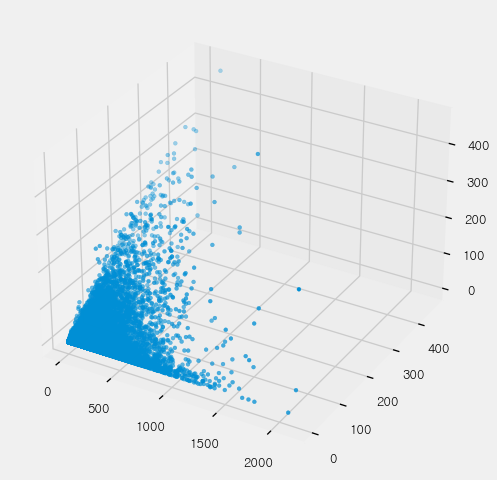

In [86]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111, projection='3d', )
#ax.view_init(30,30)
ax.scatter(cust.num_pur2, cust.num_pur3, cust.num_pur6, marker='o', s=15, cmap='Greens')

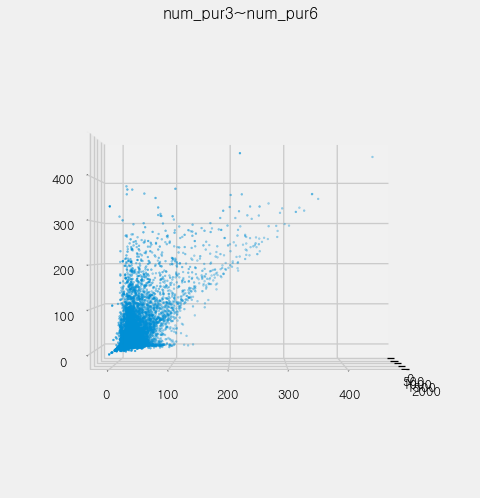

In [87]:
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.view_init(0,0)
ax1.set_title('num_pur3~num_pur6')
ax1.scatter(cust.num_pur2, cust.num_pur3, cust.num_pur6, marker='.', s=15, cmap='Greens')

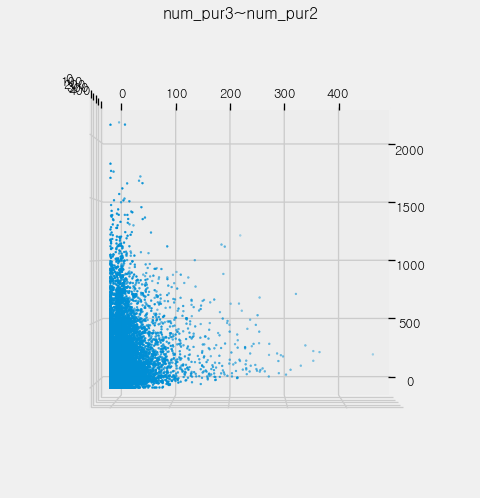

In [88]:
fig = plt.figure(figsize=(18, 8))
ax2 = fig.add_subplot(111, projection='3d')
ax2.view_init(-90,0)
ax2.set_title('num_pur3~num_pur2')
ax2.scatter(cust.num_pur2, cust.num_pur3, cust.num_pur6, marker='.', s=15, cmap='Greens')

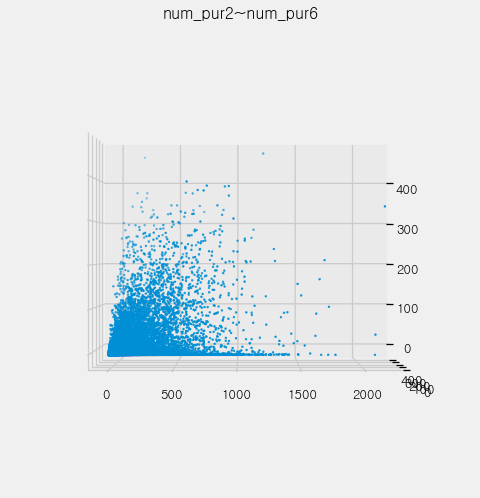

In [89]:
fig = plt.figure(figsize=(18, 8))
ax3 = fig.add_subplot(111, projection='3d')
ax3.view_init(0,-90)
ax3.set_title('num_pur2~num_pur6')
ax3.scatter(cust.num_pur2, cust.num_pur3, cust.num_pur6, marker='.', s=15, cmap='Greens')

# 고객별 각 계열사 구매 횟수
- 고객의 구매에 대한 정보가 담긴 data2, data3, data6의 계열사 구분 코드를 통해 각 계열사별 구매 횟수를 구했습니다.
- 변수 A01, A02, A03, A04, A05, A06, B01, C01, C02, D01, D02, E01, L00, L01에 각 계열사에서의 구매 횟수를 입력했습니다.

In [90]:
num_cop_c2 = only_data2.groupby(['cust', 'cop_c']).count()['rct_no']
num_cop_c3 = only_data3.groupby(['cust', 'cop_c']).count()['rct_no']
num_cop_c6 = only_data6.groupby(['cust', 'cop_c']).count()['rct_no']
num_cop_c2.name = 'num_cop_c2'
num_cop_c3.name = 'num_cop_c3'
num_cop_c6.name = 'num_cop_c6'
cust[list(data5.cop_c.unique())] = 0
cust[['A06', 'L00', 'L01']]=0
cust.head()

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,...,A05,B01,C01,C02,D01,D02,E01,A06,L00,L01
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,...,0,0,0,0,0,0,0,0,0,0
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,...,0,0,0,0,0,0,0,0,0,0
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,...,0,0,0,0,0,0,0,0,0,0
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,...,0,0,0,0,0,0,0,0,0,0
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,...,0,0,0,0,0,0,0,0,0,0


In [91]:
for i, j in num_cop_c2.index:
    cust.loc[cust.cust == i, j] += num_cop_c2[i,j]
for i, j in num_cop_c3.index:
    cust.loc[cust.cust == i, j] += num_cop_c3[i,j]
for i, j in num_cop_c6.index:
    cust.loc[cust.cust == i, j] += num_cop_c6[i,j]
cust

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,...,A05,B01,C01,C02,D01,D02,E01,A06,L00,L01
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,...,0,0,0,0,1,0,0,0,0,0
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,...,0,0,0,0,16,0,0,11,0,0
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,...,0,0,0,0,0,0,0,0,0,0
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,...,0,0,1,7,0,2,0,0,0,0
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29904,M915138788,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0,0,0,0,0,0,0
29905,M931112452,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0,0,0,0,0,0,0
29906,M937793665,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0,0,0,0,0,0,0
29907,M960942132,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0,0,0,0,0,0,0


# 고객별 이용한 계열사 수
- 고객의 모든 구매목록에 대하여 1년간 몇 개의 계열사를 이용하였는지 구하였습니다.

In [92]:
num_cop = pd.concat([only_data2.loc[:, ['cust', 'cop_c']], only_data3.loc[:, ['cust', 'cop_c']], only_data6.loc[:, ['cust', 'cop_c']]])
num_cop

,cust,cop_c
0,M000034966,A01
1,M000034966,A01
2,M000034966,A01
3,M000034966,A02
4,M000034966,A02
...,...,...
353179,M470112503,A06
353180,M470112503,A06
353181,M748878049,A02
353182,M748878049,A02


In [93]:
num_cop.groupby(['cust'])['cop_c'].unique()
# 여기서 비슷한 방식으로 유사도 구할수 있을듯?

cust
M000034966                                 [A01, A02, A04, D01]
M000059535                                                [C01]
M000136117                                 [A01, A02, A06, D01]
M000201112                                                [A04]
M000225114                            [A01, A03, C01, C02, D02]
                                    ...                        
M999708287                                                [C01]
M999770689        [A01, A02, A03, A04, D02, B01, D01, L00, A06]
M999849895                                 [A01, A02, A04, D01]
M999926092                                      [D02, C01, D01]
M999962961    [A01, A02, A03, A05, A06, C02, C01, D02, D01, ...
Name: cop_c, Length: 29870, dtype: object

In [94]:
how_many_cop = num_cop.groupby(['cust'])['cop_c'].unique().apply(len)
how_many_cop.name = 'how_many_cop'
cust = cust.merge(how_many_cop, how='left', on='cust')
cust.fillna(0, inplace=True)
cust.head()

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,...,B01,C01,C02,D01,D02,E01,A06,L00,L01,how_many_cop
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,...,0,0,0,1,0,0,0,0,0,4.0
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,...,0,0,0,16,0,0,11,0,0,4.0
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,...,0,0,0,0,0,0,0,0,0,1.0
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,...,0,1,7,0,2,0,0,0,0,5.0
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,...,0,0,0,1,0,0,0,0,0,2.0


# 고객별 온라인 친화도
- 고객의 모든 구매목록에 대하여 구매시 오프라인 채널과 온라인 채널 중 어떤 채널을 선호하였는지 구하였습니다.
- 온라인 친화도는 0과 1 사이의 값으로 전체 구매 중 온라인 구매의 비율입니다.

In [95]:
cust_chnl_dv = pd.concat([only_data2.loc[:, ['cust', 'chnl_dv']], only_data3.loc[:, ['cust', 'chnl_dv']], only_data6.loc[:, ['cust', 'chnl_dv']]])
cust_chnl_dv

,cust,chnl_dv
0,M000034966,1
1,M000034966,1
2,M000034966,1
3,M000034966,1
4,M000034966,1
...,...,...
353179,M470112503,2
353180,M470112503,2
353181,M748878049,1
353182,M748878049,1


In [96]:
online_friendly = cust_chnl_dv.loc[:, ['cust', 'chnl_dv']].groupby('cust').mean().apply(lambda x: x-1)
online_friendly.rename(columns = {'chnl_dv':'online_friendly'},inplace=True)
cust = cust.merge(online_friendly, how='left', on='cust')
cust.fillna(0, inplace=True)
cust.head()

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,...,C01,C02,D01,D02,E01,A06,L00,L01,how_many_cop,online_friendly
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,...,0,0,1,0,0,0,0,0,4.0,0.000000
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,...,0,0,16,0,0,11,0,0,4.0,0.144231
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,...,0,0,0,0,0,0,0,0,1.0,0.000000
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,...,1,7,0,2,0,0,0,0,5.0,0.000000
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,...,0,0,1,0,0,0,0,0,2.0,0.000000


# CLTV, 고객생애가치

## 평균 구매 가치
- 일정 기간 동안의 매출 / 해당 기간동안 발생한 구매 횟수

In [97]:
total_pur = pd.concat([only_data2, only_data3, only_data6]).groupby('cust')['rct_no'].count()
total_pur.name = 'total_pur'
cust = pd.merge(cust, total_pur, how='left', on='cust')
cust.fillna(0, inplace=True)
cust.head()

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,...,C02,D01,D02,E01,A06,L00,L01,how_many_cop,online_friendly,total_pur
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,...,0,1,0,0,0,0,0,4.0,0.000000,43.0
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,...,0,16,0,0,11,0,0,4.0,0.144231,104.0
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,...,0,0,0,0,0,0,0,1.0,0.000000,20.0
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,...,7,0,2,0,0,0,0,5.0,0.000000,145.0
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,...,0,1,0,0,0,0,0,2.0,0.000000,61.0


In [98]:
cust['apv'] = cust.apply(lambda x: round(x['연간구매금액236']/x['total_pur'],2) if x['total_pur'] != 0 else 0, axis=1)

total_apv = round(cust['apv'].sum() / len(cust), 2)
print('평균 구매 가치 :', total_apv)

평균 구매 가치 : 47826.81


In [99]:
cust['apv'].describe()

count    2.990900e+04
mean     4.782681e+04
std      1.417217e+05
min      0.000000e+00
25%      8.645920e+03
50%      1.654703e+04
75%      3.962781e+04
max      5.698819e+06
Name: apv, dtype: float64

In [100]:
# 로그 변환
total_log_apv = round(np.log1p(cust['apv']).sum() / len(cust), 2)
print('로그 변환 평균 구매 가치:', np.exp(total_log_apv)+1)

로그 변환 평균 구매 가치: 19733.059938929244


## 평균 구매 빈도율
- 일정 기간 동안의 구매 횟수 / 해당 기간동안 구매한 고객 수

In [101]:
# cust_pur = cust[cust['total_pur']!='0번 구매']                   # 0번 구매 고객 제외
# total_apf = round(sum(cust_pur['total_pur']) / len(cust_pur), 2)
# print('평균 구매 빈도율 :', total_apf)

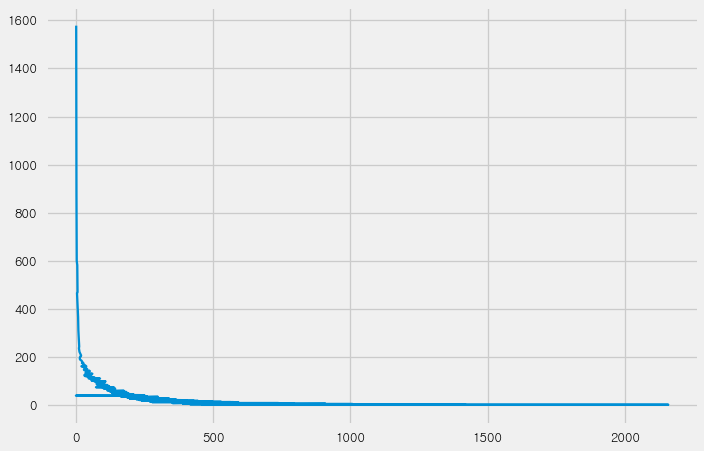

In [102]:
plt.plot(cust['total_pur'].value_counts().index,cust['total_pur'].value_counts().values)

In [103]:
total_mpf = cust[cust['total_pur']!=0]['total_pur'].median()
print('구매 빈도 중앙값:', total_mpf)

구매 빈도 중앙값: 74.0


In [104]:
cust.loc[cust['total_pur'].idxmax(),:]

cust                                                      M124357021
연간구매금액2                                                   11699200.0
연간구매금액3                                                      47300.0
연간구매금액6                                                    1808050.0
연간구매금액236                                                 11746500.0
유통평균주기                                     1 days 04:28:14.117647058
제휴평균주기                                              12 days 00:00:00
Lpay평균주기                                   1 days 23:25:09.677419354
총합평균주기                                     1 days 04:22:40.260586319
ma_fem_dv                                                         남성
ages                                                             40대
zon_hlv                                                          Z08
purchase_list      ['PD0044', 'PD0080', 'PD0082', 'PD0083', 'PD00...
Top5상품                                  [음료, 과자, 유제품, 생활/렌탈서비스, 대용식]
Top5상품금액                          

In [105]:
cust['total_pur'].describe()

count    29909.000000
mean       142.143000
std        186.882832
min          0.000000
25%         18.000000
50%         74.000000
75%        190.000000
max       2158.000000
Name: total_pur, dtype: float64

## 고객 가치
- 평균 구매 가치 X 평균 구매 빈도율

In [106]:
cust['cv'] = cust['apv'].apply(lambda x: x * total_mpf)

total_cv = round(cust['cv'].sum() / len(cust), 2)
print('평균 고객 가치 :', total_cv)

평균 고객 가치 : 3539183.69


In [107]:
cust['cv'].describe()

count    2.990900e+04
mean     3.539184e+06
std      1.048741e+07
min      0.000000e+00
25%      6.397981e+05
50%      1.224480e+06
75%      2.932458e+06
max      4.217126e+08
Name: cv, dtype: float64

## 평균 고객 수명
- 고객이 계속 구매한 년 수의 평균값

In [108]:
# 고객별 구매 날짜
only_data2['de_dt']=pd.to_datetime(only_data2.de_dt.apply(str)) 
only_data3['de_dt']=pd.to_datetime(only_data3.de_dt.apply(str)) 
only_data6['de_dt']=pd.to_datetime(only_data6.de_dt.apply(str)) 

only_data2_dt = only_data2[['cust','rct_no','de_dt']]
only_data3_dt = only_data3[['cust','rct_no','de_dt']]
only_data6_dt = only_data6[['cust','rct_no','de_dt']]
only_data236 = pd.concat([only_data2_dt, only_data3_dt, only_data6_dt])

only_data236.head()

,cust,rct_no,de_dt
0,M000034966,A01016688590,2021-01-16
1,M000034966,A01016688590,2021-01-16
2,M000034966,A01016718167,2021-01-16
3,M000034966,A02357398521,2021-03-25
4,M000034966,A02357398521,2021-03-25


In [109]:
pur_dt = only_data236.groupby(['cust','de_dt'])['de_dt'].count()

cust_lst = list(set(list(pur_dt.index.get_level_values(0))))

lt_total = pd.DataFrame(columns=['cust','dt'])

for i in range(len(cust_lst)):
    lt_total.loc[i,'cust'] = cust_lst[i]
    lt_total.loc[i,'dt'] = list(pur_dt[cust_lst[i]].index)
    
lt_total.head()

,cust,dt
0,M336831476,"[2021-02-22 00:00:00, 2021-02-26 00:00:00, 202..."
1,M951469922,"[2021-01-02 00:00:00, 2021-01-08 00:00:00, 202..."
2,M433403084,"[2021-01-02 00:00:00, 2021-01-15 00:00:00, 202..."
3,M324482167,"[2021-01-08 00:00:00, 2021-01-18 00:00:00, 202..."
4,M524104915,"[2021-01-06 00:00:00, 2021-02-01 00:00:00, 202..."


In [110]:
lt_total

,cust,dt
0,M336831476,"[2021-02-22 00:00:00, 2021-02-26 00:00:00, 202..."
1,M951469922,"[2021-01-02 00:00:00, 2021-01-08 00:00:00, 202..."
2,M433403084,"[2021-01-02 00:00:00, 2021-01-15 00:00:00, 202..."
3,M324482167,"[2021-01-08 00:00:00, 2021-01-18 00:00:00, 202..."
4,M524104915,"[2021-01-06 00:00:00, 2021-02-01 00:00:00, 202..."
...,...,...
29865,M907356655,"[2021-03-18 00:00:00, 2021-04-26 00:00:00, 202..."
29866,M920270819,"[2021-01-03 00:00:00, 2021-01-06 00:00:00, 202..."
29867,M619970140,"[2021-12-26 00:00:00, 2021-12-31 00:00:00]"
29868,M604001792,[2021-08-08 00:00:00]


In [111]:
lt_total['dt'] = lt_total['dt'].apply(lambda x: sorted(x))
lt_total['len'] = lt_total['dt'].apply(lambda x: len(x))
lt_total['lt'] = lt_total.apply(lambda x: round(1/365,3) if x['len']==1 else round((x['dt'][-1]-x['dt'][0]).days/365,3), axis=1)
lt_total.head()

,cust,dt,len,lt
0,M336831476,"[2021-02-22 00:00:00, 2021-02-26 00:00:00, 202...",113,0.767
1,M951469922,"[2021-01-02 00:00:00, 2021-01-08 00:00:00, 202...",23,0.975
2,M433403084,"[2021-01-02 00:00:00, 2021-01-15 00:00:00, 202...",87,0.951
3,M324482167,"[2021-01-08 00:00:00, 2021-01-18 00:00:00, 202...",56,0.915
4,M524104915,"[2021-01-06 00:00:00, 2021-02-01 00:00:00, 202...",33,0.942


In [112]:
cust = pd.merge(cust, lt_total[['cust','lt']], how='left', on='cust')
cust

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,...,E01,A06,L00,L01,how_many_cop,online_friendly,total_pur,apv,cv,lt
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,...,0,0,0,0,4.0,0.000000,43.0,15302.79,1132406.46,0.934
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,...,0,11,0,0,4.0,0.144231,104.0,276428.18,20455685.32,0.986
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,...,0,0,0,0,1.0,0.000000,20.0,2656.00,196544.00,0.345
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,...,0,0,0,0,5.0,0.000000,145.0,15544.14,1150266.36,0.833
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,...,0,0,0,0,2.0,0.000000,61.0,99605.74,7370824.76,0.921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29904,M915138788,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0,0.0,0.000000,0.0,0.00,0.00,NaN
29905,M931112452,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0,0.0,0.000000,0.0,0.00,0.00,NaN
29906,M937793665,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0,0.0,0.000000,0.0,0.00,0.00,NaN
29907,M960942132,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0,0.0,0.000000,0.0,0.00,0.00,NaN


In [113]:
cust['lt'].fillna(0, inplace=True)

total_acl = round(cust['lt'].mean(), 2)
print('평균 고객 수명:', total_acl)

평균 고객 수명: 0.76


## 고객 생애 가치
- 고객 가치 X 고객 수명

In [114]:
cust['cltv'] = cust.apply(lambda x: x['cv'] * x['lt'], axis=1)
cust

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,...,A06,L00,L01,how_many_cop,online_friendly,total_pur,apv,cv,lt,cltv
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,...,0,0,0,4.0,0.000000,43.0,15302.79,1132406.46,0.934,1.057668e+06
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,...,11,0,0,4.0,0.144231,104.0,276428.18,20455685.32,0.986,2.016931e+07
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,...,0,0,0,1.0,0.000000,20.0,2656.00,196544.00,0.345,6.780768e+04
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,...,0,0,0,5.0,0.000000,145.0,15544.14,1150266.36,0.833,9.581719e+05
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,...,0,0,0,2.0,0.000000,61.0,99605.74,7370824.76,0.921,6.788530e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29904,M915138788,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0.0,0.000000,0.0,0.00,0.00,0.000,0.000000e+00
29905,M931112452,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0.0,0.000000,0.0,0.00,0.00,0.000,0.000000e+00
29906,M937793665,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0.0,0.000000,0.0,0.00,0.00,0.000,0.000000e+00
29907,M960942132,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,남성,...,0,0,0,0.0,0.000000,0.0,0.00,0.00,0.000,0.000000e+00


In [115]:
cust['cltv'].describe()

count    2.990900e+04
mean     2.427157e+06
std      6.908710e+06
min      0.000000e+00
25%      4.276005e+05
50%      8.912700e+05
75%      2.174580e+06
max      2.470619e+08
Name: cltv, dtype: float64

In [116]:
cust.loc[cust['cltv'].idxmax(),:]

cust                         M669977400
연간구매금액2                      15355000.0
연간구매금액3                          7000.0
연간구매금액6                             0.0
연간구매금액236                    15362000.0
유통평균주기                238 days 00:00:00
제휴평균주기                            1번 구매
Lpay평균주기                          0번 구매
총합평균주기                119 days 00:00:00
ma_fem_dv                            남성
ages                                30대
zon_hlv                             Z10
purchase_list      ['PD1685', 'PD1752']
Top5상품                  [테넌트/음식점, 패션잡화]
Top5상품금액                  308607.782517
num_pur2                            2.0
num_pur3                            1.0
num_pur6                            0.0
num_pur                             3.0
A01                                   1
A02                                   1
A03                                   0
A04                                   0
A05                                   0
B01                                   0


In [117]:
total_ltv = total_cv * total_acl
print('평균 고객 생애 가치 :', total_ltv)

평균 고객 생애 가치 : 2689779.6044


In [118]:
cust = cust.drop(['apv','cv','lt','total_pur'], axis=1)

In [119]:
cust.head()

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,...,C02,D01,D02,E01,A06,L00,L01,how_many_cop,online_friendly,cltv
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,...,0,1,0,0,0,0,0,4.0,0.000000,1.057668e+06
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,...,0,16,0,0,11,0,0,4.0,0.144231,2.016931e+07
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,...,0,0,0,0,0,0,0,1.0,0.000000,6.780768e+04
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,...,7,0,2,0,0,0,0,5.0,0.000000,9.581719e+05
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,...,0,1,0,0,0,0,0,2.0,0.000000,6.788530e+06


In [120]:
cust.columns

Index(['cust', '연간구매금액2', '연간구매금액3', '연간구매금액6', '연간구매금액236', '유통평균주기',
       '제휴평균주기', 'Lpay평균주기', '총합평균주기', 'ma_fem_dv', 'ages', 'zon_hlv',
       'purchase_list', 'Top5상품', 'Top5상품금액', 'num_pur2', 'num_pur3',
       'num_pur6', 'num_pur', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01',
       'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01', 'how_many_cop',
       'online_friendly', 'cltv'],
      dtype='object')

In [121]:
cust.isnull().sum()

cust               0
연간구매금액2            0
연간구매금액3            0
연간구매금액6            0
연간구매금액236          0
유통평균주기             0
제휴평균주기             0
Lpay평균주기           0
총합평균주기             0
ma_fem_dv          0
ages               0
zon_hlv            0
purchase_list      0
Top5상품             0
Top5상품금액           0
num_pur2           0
num_pur3           0
num_pur6           0
num_pur            0
A01                0
A02                0
A03                0
A04                0
A05                0
B01                0
C01                0
C02                0
D01                0
D02                0
E01                0
A06                0
L00                0
L01                0
how_many_cop       0
online_friendly    0
cltv               0
dtype: int64

In [ ]:
cust.to_csv('../clustering/customer.csv')